<a href="https://colab.research.google.com/github/AdiFaouri/Data-Analytics/blob/main/traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
تم تحميل البيانات بنجاح!

أول 5 صفوف من مجموعة البيانات (head()):
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


معلومات حول مجموعة البيانات (info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (tota

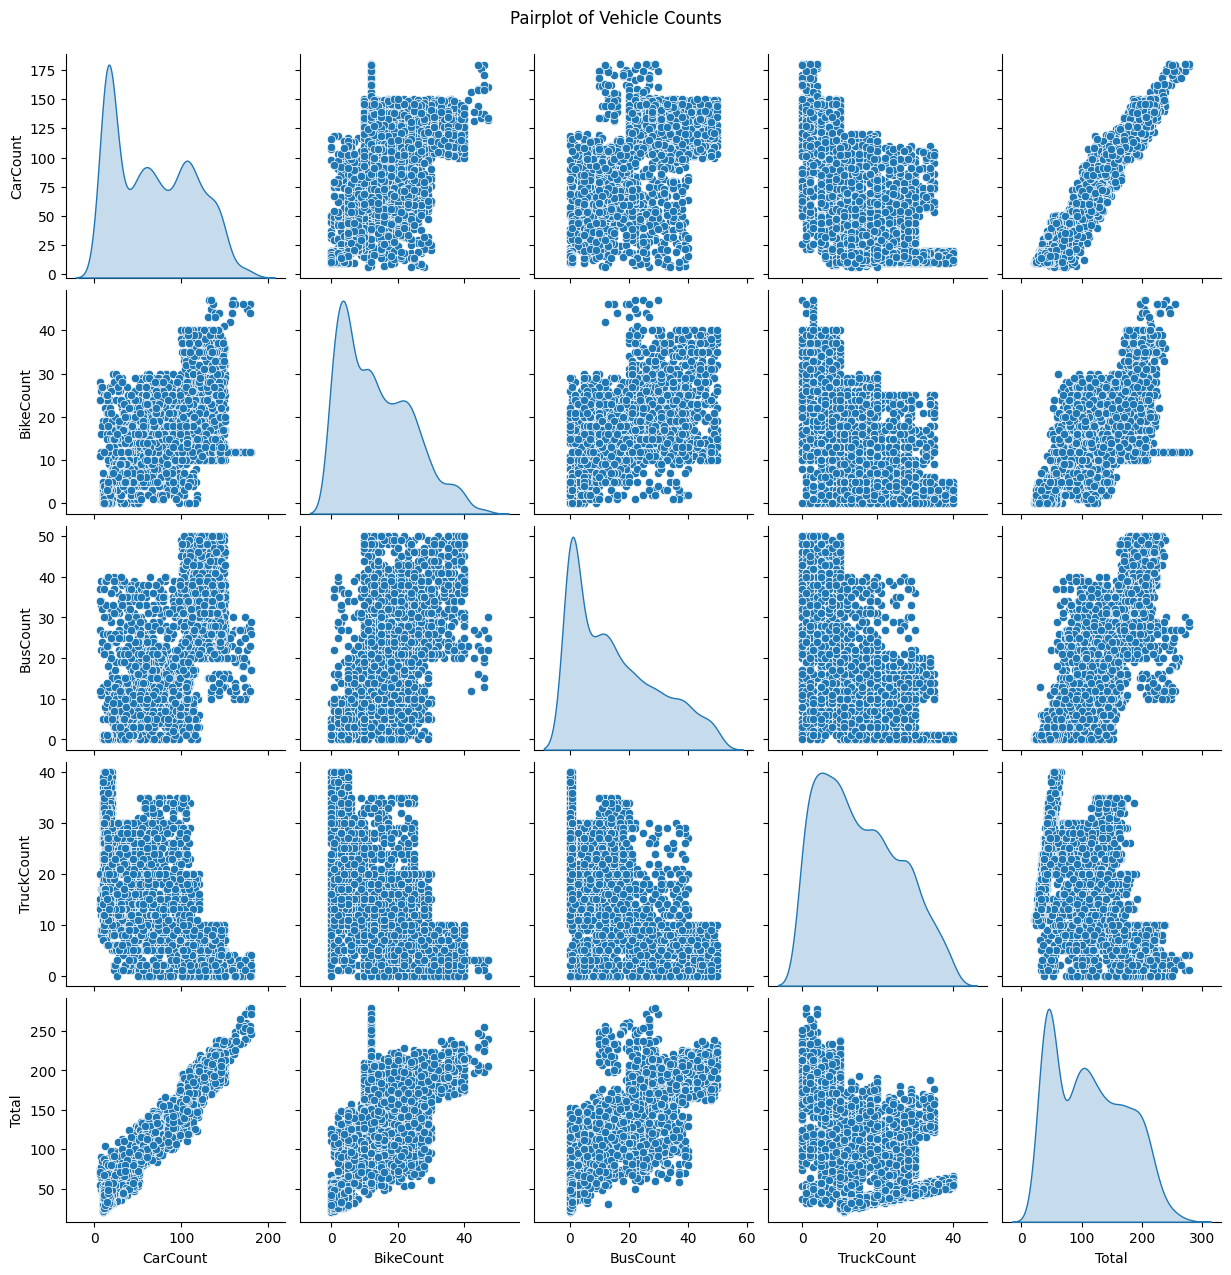

  - تم عرض الـ Pairplot بنجاح.

--- ملاحظات حول قراءة الـ Pairplot: ---
  - على القطر (المحور الرئيسي من أعلى اليسار إلى أسفل اليمين): سترى توزيع كل متغير بمفرده (باستخدام KDE هنا).
  - خارج القطر: سترى رسومًا بيانية مبعثرة (scatter plots) تظهر العلاقة بين كل زوج من المتغيرات.
    - إذا كانت النقاط تميل لتشكيل خط مستقيم أو منحنى، فهناك علاقة قوية.
    - إذا كانت النقاط منتشرة عشوائيًا، فهناك علاقة ضعيفة أو لا توجد علاقة.
    - يمكن أن تساعدك في تحديد الارتباطات (correlations) بين المتغيرات.

--- 7. توزيع حالة المرور (Traffic Situation Distribution) ---

توزيع فئات Traffic Situation:
Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64




/tmp/ipython-input-3-1207420755.py:212: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_situation_counts.index, y=traffic_situation_counts.values, palette='viridis')


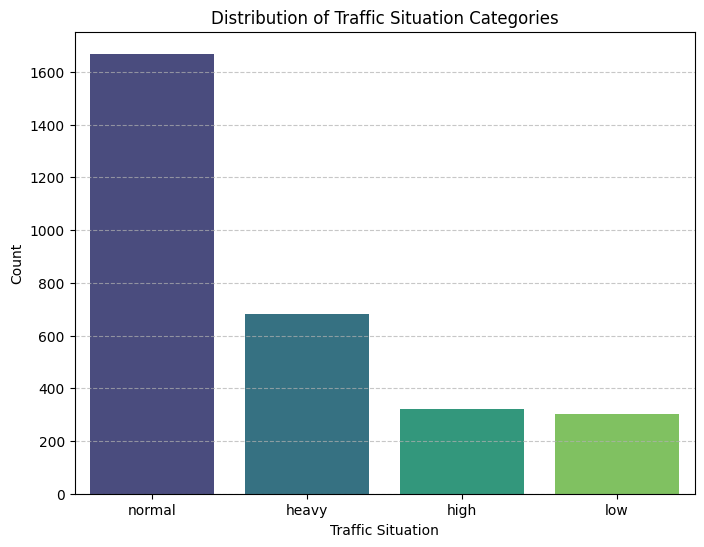

  - تم عرض المخطط الشريطي لتوزيع Traffic Situation بنجاح.

--- ملاحظات حول مخطط توزيع حالة المرور: ---
  - يعرض هذا المخطط عدد مرات ظهور كل فئة (Low, Normal, High) في عمود 'Traffic Situation'.
  - يمكنك بسهولة رؤية الفئة الأكثر تكرارًا والأقل تكرارًا.

--- 8. حفظ البيانات النظيفة (Save Cleaned Data) ---

تم حفظ مجموعة البيانات النظيفة بنجاح إلى الملف: 'traffic_cleaned.csv'
يمكنك الآن العثور على الملف 'traffic_cleaned.csv' في نفس المجلد الذي تقوم بتشغيل الكود منه.

--- اكتملت عملية تنظيف البيانات بالكامل! ---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل مجموعة البيانات (Data Exploration)

TrafficData = pd.read_csv('/content/traffic.csv')
print("تم تحميل البيانات بنجاح!\n")

#عرض أول 5 صفوف (head())
print("أول 5 صفوف من مجموعة البيانات (head()):")
print(TrafficData.head())
print("\n" + "="*50 + "\n")

# معلومات مجموعة البيانات (info())
print("معلومات حول مجموعة البيانات (info()):")
TrafficData.info()
print("\n" + "="*50 + "\n")

 # ملخص إحصائي أساسي (describe())
print("ملخص إحصائي أساسي لمجموعة البيانات (describe()):")
print(TrafficData.describe())
print("\n" + "="*50 + "\n")

#-----------------------------------------------------------

print("--- 2. معالجة القيم المفقودة (Missing Values Handling) ---\n")

# 1. التحقق من القيم المفقودة في مجموعة البيانات
print("القيم المفقودة قبل المعالجة:")
print(TrafficData.isnull().sum())
print("\n" + "="*50 + "\n")

# 2. معالجة القيم المفقودة إذا وجدت:

# 2.1. للأعمدة CarCount, BikeCount, BusCount, TruckCount:
# استبدال القيم المفقودة بمتوسطات الأعمدة الخاصة بها.
columns_to_impute_mean = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

print("جاري تعويض القيم المفقودة في أعمدة المركبات بالمتوسط...")
for col in columns_to_impute_mean:
    if TrafficData[col].isnull().any(): # تحقق إذا كان هناك أي قيم مفقودة في العمود
        col_mean = TrafficData[col].mean()
        TrafficData[col].fillna(col_mean, inplace=True)
        print(f"  - تم تعويض القيم المفقودة في '{col}' بالمتوسط: {col_mean:.2f}")
    else:
        print(f"  - لا توجد قيم مفقودة في '{col}' لتعبئتها.")

print("\n" + "="*50 + "\n")

# 2.2. لـ Traffic Situation:
# استبدال القيم المفقودة بالفئة الأكثر تكراراً (الوضع).
print("جاري تعويض القيم المفقودة في 'Traffic Situation' بالوضع (Mode)...")
if 'Traffic Situation' in TrafficData.columns and TrafficData['Traffic Situation'].isnull().any():
    most_frequent_category = TrafficData['Traffic Situation'].mode()[0] # [0] لأن mode() قد تعيد عدة قيم إذا تكررت بنفس العدد
    TrafficData['Traffic Situation'].fillna(most_frequent_category, inplace=True)
    print(f"  - تم تعويض القيم المفقودة في 'Traffic Situation' بالفئة الأكثر تكراراً: '{most_frequent_category}'")
elif 'Traffic Situation' not in TrafficData.columns:
    print("  - عمود 'Traffic Situation' غير موجود في البيانات.")
else:
    print("  - لا توجد قيم مفقودة في 'Traffic Situation' لتعبئتها.")

print("\n" + "="*50 + "\n")

# 2.3. لـ Day of the week:
# حذف أي صفوف تحتوي على قيم مفقودة في هذا العمود.
print("جاري حذف الصفوف التي تحتوي على قيم مفقودة في 'Day of the week'...")
original_rows = TrafficData.shape[0] # عدد الصفوف قبل الحذف
if 'Day of the week' in TrafficData.columns and TrafficData['Day of the week'].isnull().any():
    TrafficData.dropna(subset=['Day of the week'], inplace=True)
    rows_after_drop = TrafficData.shape[0]
    print(f"  - تم حذف {original_rows - rows_after_drop} صفوف.")
else:
    print("  - لا توجد قيم مفقودة في 'Day of the week' لحذفها أو العمود غير موجود.")
print("\n" + "="*50 + "\n")

# 3. التحقق مرة أخرى من القيم المفقودة بعد المعالجة
print("القيم المفقودة بعد المعالجة:")
print(TrafficData.isnull().sum())
print("\n" + "="*50 + "\n")

# يمكنك الآن عرض معلومات موجزة عن البيانات للتأكد
print("معلومات موجزة عن البيانات بعد معالجة القيم المفقودة:")
TrafficData.info()

print("\n--- 3. السجلات المكررة (Duplicate Records) ---\n")

# 1. التحقق من الصفوف المكررة
initial_rows = TrafficData.shape[0] # عدد الصفوف قبل إزالة المكررة
num_duplicates = TrafficData.duplicated().sum()

print(f"عدد الصفوف المكررة الموجودة في مجموعة البيانات: {num_duplicates}\n")

# 2. إذا وجدت سجلات مكررة، قم بإزالتها
if num_duplicates > 0:
    print("جاري إزالة الصفوف المكررة...")
    TrafficData.drop_duplicates(inplace=True)
    rows_after_dropping = TrafficData.shape[0]
    print(f"تم إزالة {num_duplicates} صفوف مكررة.")
    print(f"عدد الصفوف بعد إزالة المكررة: {rows_after_dropping}\n")
else:
    print("لا توجد صفوف مكررة في مجموعة البيانات. لا داعي للحذف.\n")

print("--- تم الانتهاء من معالجة السجلات المكررة ---\n")

# يمكنك الآن عرض معلومات موجزة عن البيانات للتأكد من حجمها الجديد
print("معلومات موجزة عن البيانات بعد معالجة السجلات المكررة:")
TrafficData.info()

print("\n--- 4. اكتشاف ومعالجة القيم المتطرفة (Outliers Detection and Treatment) ---\n")

columns_to_check_outliers = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

for col in columns_to_check_outliers:
    print(f"\n--- معالجة القيم المتطرفة في العمود: '{col}' ---")

    if col not in TrafficData.columns:
        print(f"  - تحذير: العمود '{col}' غير موجود في مجموعة البيانات. تخطي.")
        continue

    # حساب الوسيط (Median) لهذا العمود (سنستخدمه لاستبدال القيم المتطرفة)
    col_median = TrafficData[col].median()
    print(f"  - وسيط العمود '{col}': {col_median:.2f}")

    # 1. الكشف عن القيم الأقل من 0 (المستحيلة للعد)
    negative_outliers = TrafficData[TrafficData[col] < 0]
    num_negative_outliers = len(negative_outliers)

    if num_negative_outliers > 0:
        print(f"  - تم اكتشاف {num_negative_outliers} قيمة متطرفة (أقل من 0) في '{col}'.")
        # استبدال القيم المتطرفة الأقل من 0 بالوسيط
        TrafficData.loc[TrafficData[col] < 0, col] = col_median
        print(f"  - تم استبدال القيم المتطرفة الأقل من 0 في '{col}' بالوسيط.")
    else:
        print(f"  - لم يتم اكتشاف قيم متطرفة أقل من 0 في '{col}'.")

 # 2. الكشف عن القيم العالية جداً باستخدام طريقة IQR
    Q1 = TrafficData[col].quantile(0.25)
    Q3 = TrafficData[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # القيم المتطرفة العالية هي التي تكون أكبر من الحد الأعلى
    high_outliers = TrafficData[TrafficData[col] > upper_bound]
    num_high_outliers = len(high_outliers)

    if num_high_outliers > 0:
        print(f"  - تم اكتشاف {num_high_outliers} قيمة متطرفة (عالية جداً باستخدام IQR) في '{col}'.")
        print(f"    (Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, الحد الأعلى={upper_bound:.2f})")
        # استبدال القيم المتطرفة العالية بالوسيط
        TrafficData.loc[TrafficData[col] > upper_bound, col] = col_median
        print(f"  - تم استبدال القيم المتطرفة العالية في '{col}' بالوسيط.")
    else:
        print(f"  - لم يتم اكتشاف قيم متطرفة عالية جداً في '{col}' باستخدام طريقة IQR.")

print("\n--- تم الانتهاء من معالجة القيم المتطرفة ---\n")

# يمكنك التحقق من الملخص الإحصائي مرة أخرى للتأكد من التغييرات
print("الملخص الإحصائي بعد معالجة القيم المتطرفة:")
print(TrafficData[columns_to_check_outliers].describe())

print("\n--- 6. عرض Pairplot لتحليل العلاقات بين المتغيرات ---")

# تحديد الأعمدة التي نرغب في تضمينها في الـ Pairplot
# عادةً ما يتم تضمين الأعمدة العددية الرئيسية هنا.
# يمكننا استخدام أعمدة عدد المركبات بالإضافة إلى 'Total' إذا كانت موجودة،
# أو أي أعمدة عددية أخرى ذات صلة.
columns_for_pairplot = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# للتأكد من أن الأعمدة موجودة بالفعل في DataFrame
existing_columns_for_pairplot = [col for col in columns_for_pairplot if col in TrafficData.columns]

if not existing_columns_for_pairplot:
    print("  - لا توجد أعمدة صالحة للرسم في القائمة المحددة. يرجى التحقق من أسماء الأعمدة.")
else:
    print(f"  - جاري إنشاء Pairplot للأعمدة: {', '.join(existing_columns_for_pairplot)}...")
    # إنشاء الـ Pairplot
    # 'diag_kind="kde"' يرسم تقدير الكثافة على القطر بدلاً من Histograms
    # 'height' يحدد ارتفاع كل رسم بياني فرعي، مما يؤثر على الحجم الكلي
    sns.pairplot(TrafficData[existing_columns_for_pairplot], diag_kind="kde")
    plt.suptitle('Pairplot of Vehicle Counts', y=1.02) # وضع عنوان عام فوق جميع الرسوم
    plt.show()
    print("  - تم عرض الـ Pairplot بنجاح.")

print("\n--- ملاحظات حول قراءة الـ Pairplot: ---")
print("  - على القطر (المحور الرئيسي من أعلى اليسار إلى أسفل اليمين): سترى توزيع كل متغير بمفرده (باستخدام KDE هنا).")
print("  - خارج القطر: سترى رسومًا بيانية مبعثرة (scatter plots) تظهر العلاقة بين كل زوج من المتغيرات.")
print("    - إذا كانت النقاط تميل لتشكيل خط مستقيم أو منحنى، فهناك علاقة قوية.")
print("    - إذا كانت النقاط منتشرة عشوائيًا، فهناك علاقة ضعيفة أو لا توجد علاقة.")
print("    - يمكن أن تساعدك في تحديد الارتباطات (correlations) بين المتغيرات.")

print("\n--- 7. توزيع حالة المرور (Traffic Situation Distribution) ---\n")

# التحقق مما إذا كان العمود 'Traffic Situation' موجوداً
if 'Traffic Situation' not in TrafficData.columns:
    print("  - تحذير: العمود 'Traffic Situation' غير موجود في مجموعة البيانات. تخطي الرسم.")
else:
    # حساب عدد مرات تكرار كل فئة
    traffic_situation_counts = TrafficData['Traffic Situation'].value_counts()

    print("توزيع فئات Traffic Situation:")
    print(traffic_situation_counts)
    print("\n")

# 1. إنشاء مخطط شريطي (Bar Chart)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=traffic_situation_counts.index, y=traffic_situation_counts.values, palette='viridis')
    plt.title('Distribution of Traffic Situation Categories')
    plt.xlabel('Traffic Situation')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7) # إضافة شبكة أفقية لتحسين القراءة
    plt.show()

    print("  - تم عرض المخطط الشريطي لتوزيع Traffic Situation بنجاح.")

    # إذا كنت تفضل مخطط دائري (Pie Chart)، يمكنك استخدام الكود التالي بدلاً من Bar Chart
    # (الـ Bar Chart يفضل عادة للمقارنة، والـ Pie Chart لأجزاء من الكل)
    # print("\n--- خيار: مخطط دائري (Pie Chart) لتوزيع Traffic Situation ---")
    # plt.figure(figsize=(8, 8))
    # plt.pie(traffic_situation_counts, labels=traffic_situation_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    # plt.title('Distribution of Traffic Situation Categories')
    # plt.axis('equal') # يضمن أن المخطط الدائري دائري
    # plt.show()
    # print("  - تم عرض المخطط الدائري لتوزيع Traffic Situation بنجاح.")


print("\n--- ملاحظات حول مخطط توزيع حالة المرور: ---")
print("  - يعرض هذا المخطط عدد مرات ظهور كل فئة (Low, Normal, High) في عمود 'Traffic Situation'.")
print("  - يمكنك بسهولة رؤية الفئة الأكثر تكرارًا والأقل تكرارًا.")


print("\n--- 8. حفظ البيانات النظيفة (Save Cleaned Data) ---\n")

# اسم الملف الذي سيتم حفظ البيانات النظيفة فيه
output_filename = 'traffic_cleaned.csv'

# حفظ الـ DataFrame النظيف إلى ملف CSV جديد
# index=False يمنع pandas من كتابة فهرس الـ DataFrame كعمود في ملف CSV.
TrafficData.to_csv(output_filename, index=False)

print(f"تم حفظ مجموعة البيانات النظيفة بنجاح إلى الملف: '{output_filename}'")
print(f"يمكنك الآن العثور على الملف '{output_filename}' في نفس المجلد الذي تقوم بتشغيل الكود منه.")

print("\n--- اكتملت عملية تنظيف البيانات بالكامل! ---\n")
